In [95]:
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv", index_col=0)

start_date = input("Enter start Date: ")
end_date = input("Enter end date: ") 

date_select = pd.DataFrame(phone_df.loc[start_date:end_date])
print(date_select)

user_selected_stat = input('Please choose a column from the above stats: ')
stat_series = pd.Series(date_select[user_selected_stat])

sum = stat_series.sum()
mean = stat_series.mean()
std = stat_series.std()
median = stat_series.median()
min = stat_series.min()
max = stat_series.max()

print()
print("You chose:", user_selected_stat, "which is shown below with the corresponding dates")

print(stat_series)

         Screen Time Total (minutes)  Social (minutes)  \
Date                                                     
2/28/22                          335               127   
3/1/22                           437               217   
3/2/22                           285               200   
3/3/22                           155                76   
3/4/22                           205               126   

         Information & Reading (Minutes)  Other (minutes)  \
Date                                                        
2/28/22                               17               34   
3/1/22                               124               21   
3/2/22                                13               31   
3/3/22                                 9                9   
3/4/22                                29                7   

         Entertainment (minutes)  Productivity and Finance  
Date                                                        
2/28/22                      146           

In [96]:

stats_dict = {'Stats':['Sum', 'Mean','Std Deviation','Median','Min','Max'], 'Number': [sum, mean, std, median, min, max]}
stats_dict_df = pd.DataFrame(stats_dict)

stats_dict_df.to_csv("output_phone_data.csv", header = False, index = False, float_format = "%.2f")

merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')
merged_df.to_csv("data_merged_df.csv")

grouped_by_day = merged_df.groupby("Day of Week", sort = False)


mean_user_ser = pd.Series(dtype=float)

for group_name, date_select in grouped_by_day:
    group_mean_pop = date_select[user_selected_stat].mean()
    mean_user_ser[group_name] = group_mean_pop
mean_user_ser.name = "Mean per day of the week:", user_selected_stat

print()
print("And here is the average number of", user_selected_stat, "for each day of the week")
print()
print(mean_user_ser)


And here is the average number of Social (minutes) for each day of the week

Sunday       169.777778
Monday       134.000000
Tuesday      171.555556
Wednesday    132.333333
Thursday     136.444444
Friday       183.875000
Saturday     163.000000
Name: (Mean per day of the week:, Social (minutes)), dtype: float64


<AxesSubplot:xlabel='Date'>

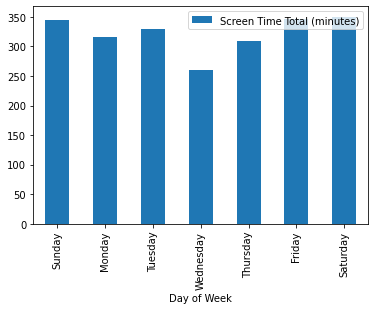

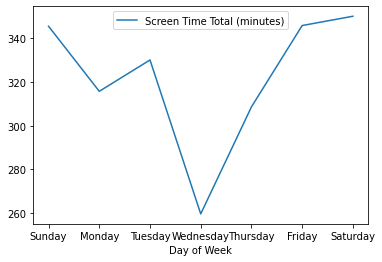

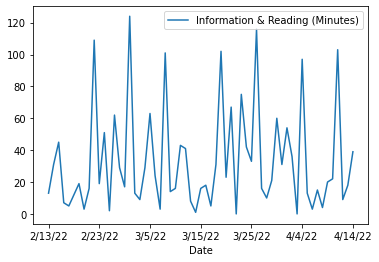

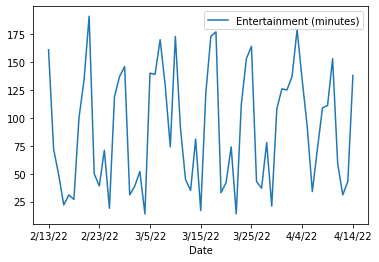

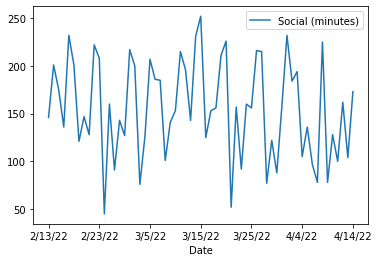

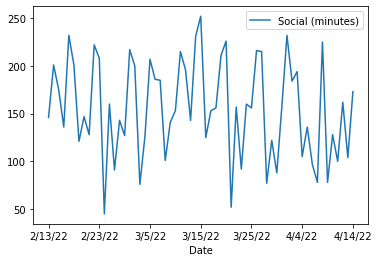

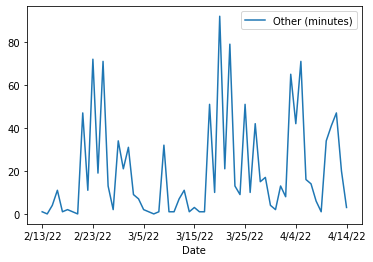

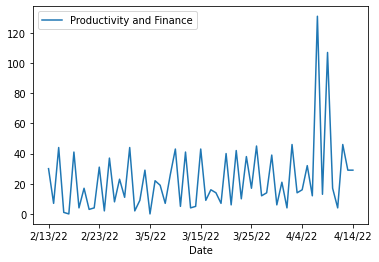

In [97]:
import matplotlib as plt
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='bar', legend=True)

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Information & Reading (Minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Entertainment (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Social (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Social (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Other (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Productivity and Finance']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

<AxesSubplot:title={'center':'Comparison'}, xlabel='Number of Days (Time)', ylabel='Minutes'>

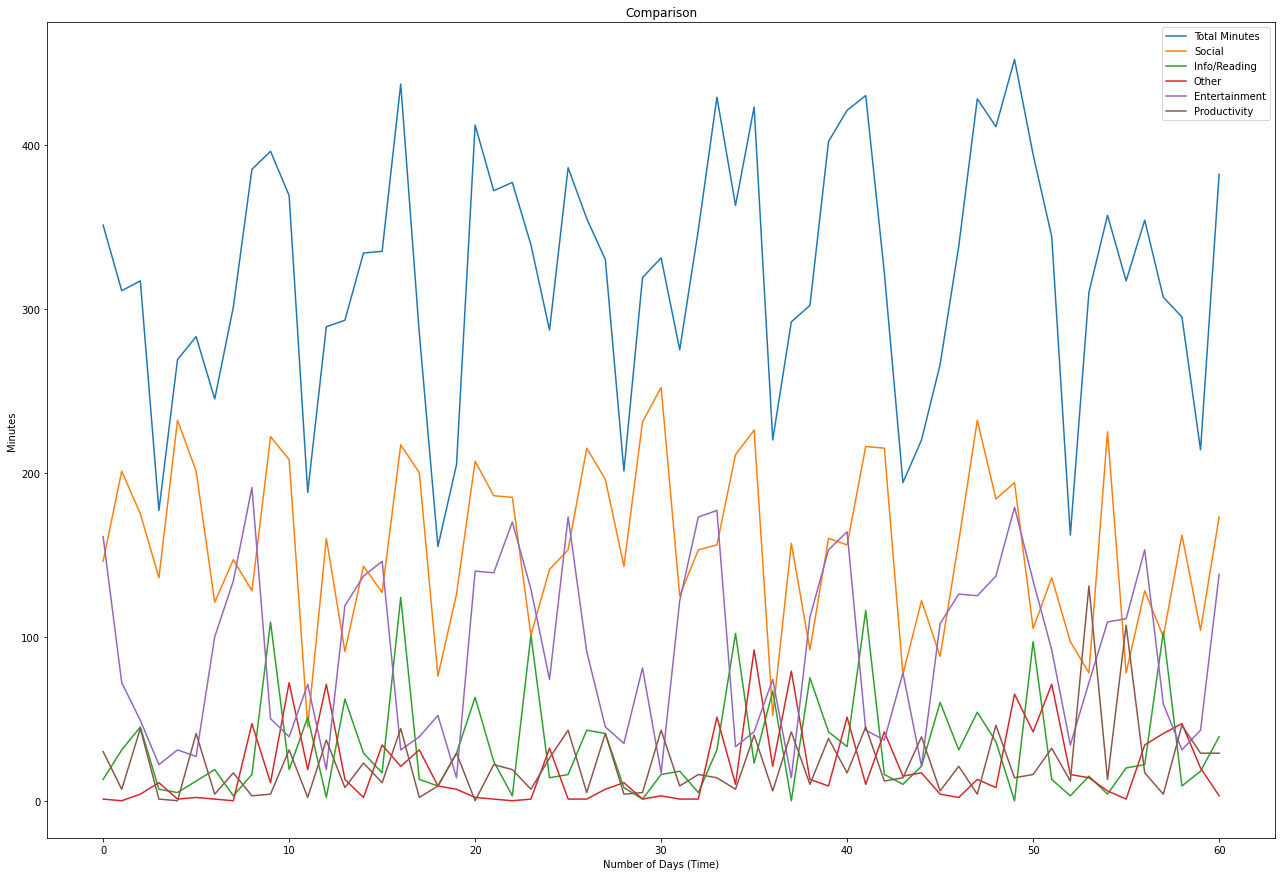

In [98]:
import mypytable
import numpy as np
import utils
from mypytable import MyPyTable
from utils import get_column
import importlib
importlib.reload(mypytable)
importlib.reload(utils)
import matplotlib.pyplot as plt

table = MyPyTable()
mv_file = table.load_from_file("phone_data.csv")

mv_header = mv_file.column_names
mv_table = mv_file.data

master_col = mv_file.get_column("Screen Time Total (minutes)")
social_col = mv_file.get_column("Social (minutes)")
info_col = mv_file.get_column("Information & Reading (Minutes)")
other_col = mv_file.get_column("Other (minutes)")
entertainment_col = mv_file.get_column("Entertainment (minutes)")
productivity_col = mv_file.get_column("Productivity and Finance")

#Information & Reading (Minutes),Other (minutes),Entertainment (minutes),Productivity and Finance
date_col = mv_file.get_column("Date")

series_obj1 = pd.Series(data=master_col, name="Total Minutes")
series_obj1.plot(legend=True)
series_obj2 = pd.Series(data=social_col, name="Social")
series_obj2.plot(legend=True)
series_obj3 = pd.Series(data=info_col, name="Info/Reading")
series_obj3.plot(legend=True)
series_obj4 = pd.Series(data=other_col, name="Other")
series_obj4.plot(legend=True)
series_obj5 = pd.Series(data=entertainment_col, name="Entertainment")
series_obj5.plot(legend=True)
series_obj6 = pd.Series(data=productivity_col, name="Productivity")

series_obj6.plot(figsize=(22,15), title="Comparison", legend=True, xlabel="Number of Days (Time)", ylabel="Minutes")


Text(0, 0.5, 'Minutes')

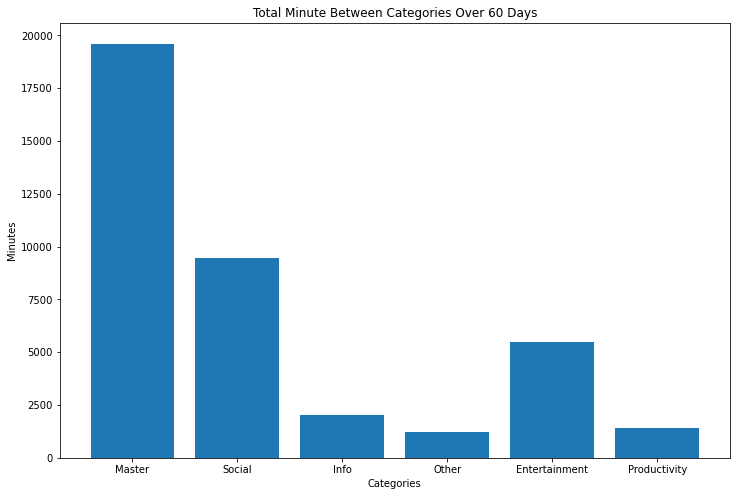

In [99]:
master_sum = np.sum(master_col)
social_sum = np.sum(social_col)
info_sum = np.sum(info_col)
oth_sum = np.sum(other_col)
ent_sum = np.sum(entertainment_col)
prod_sum = np.sum(productivity_col)

stats_dict = {'Stats':['Categories','Master', 'Social','Info','Other','Entertainment','Productivity'], 'Number': ["Minutes", master_sum, social_sum, info_sum, oth_sum, ent_sum, prod_sum]}
stats_dict_df = pd.DataFrame(stats_dict)
stats_dict_df.to_csv("output_total_data.csv", header = 0, index = False, float_format = "%.2f")

new_df = pd.read_csv("output_total_data.csv")

categories = new_df['Categories']
mins = new_df['Minutes']
f, ax = plt.subplots(figsize=(12,8))
bar_chart = plt.bar(categories, mins)
plt.title('Total Minute Between Categories Over 60 Days')
plt.xlabel('Categories')
plt.ylabel('Minutes')

In [100]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

X_train = phone_df.drop("Date", axis=1)
y_train = phone_df["Date"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([330, 140, 35, 10, 100, 20], index=phone_df.columns.drop("Date"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['2/27/22']


In [101]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df = merged_df.drop("Date", axis=1)

X_train = merged_df.drop("Day of Week", axis=1)
y_train = merged_df["Day of Week"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([330, 140, 35, 10, 100, 20], index=merged_df.columns.drop("Day of Week"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['Sunday']


In [102]:
iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)

my_decimal_score = accuracy_score(y_test, y_predicted)
my_score = my_decimal_score*100
rounded = str(round(my_score, 2))

print("Accuracy score:", rounded, end="%")

Accuracy score: 97.78%

Decision Tree: 


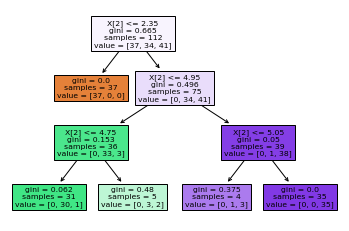

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 3, max_features = 0.65, splitter='best')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

tree.plot_tree(clf, max_depth = 3, filled = True)
print("Decision Tree: ")

#notes:
#expand upon decision tree explaination
#make the graphs all in one, now having the information, come up with some cool visuals